## Clustering:

Second, we asked "Are there distinct clusters of anime-watchers?" Through demographic and usage data tied to every user, we aimed to implement a form of $k$-means clustering to partition the user set. This would inform anime studios of stereotypical user profiles from which to infer preferences. Clustering would also provide insight into “lookalike” audiences for the company’s user base, giving marketing management concrete audiences to prioritize. Clustering may also facilitate more effective budget allocations for marketing and acquisition of anime streaming/broadcasting rights.

    Covariates:               Description:
    days spent watching       number of days (again, not hours or minutes, days) the user has spent watching anime
    age                       age of the user, computed from user's date of birth
    average rating            mean of the user's ratings of anime on their anime list
    male                      one-hot: user's gender is declared male

Using the full dataset, we sought covariates that ecompassed both past and present users of MyAnimeList. Multiple models were generated using location and join year but negligible or no improvements in clustering were seen. Further, the specific genre interests of users proved far too difficult to extract in the scope of this project but likely would have proved important. For interpretability and simplicity, these four covariates were chosen. 

One main question associated with the $k$-means algorithm is the input k, the number of clusters. In a dataset with which no known cluster structure exists, we fist had to utilize metric tests to find such input k. The most common test is the "elbow test" in which an economical number of clusters is chosen where diminishing returns on the $k$-means loss function begins. As the number of clusters increases, the loss will always decreases so a point is found where adding another cluster doesn't improve modeling. This graph is shown below in blue. There are a few different candidates for optimal so an additional metric test was used. The average silhouette score of a clustering reflects the cohesion between points in a cluster and seperation between clusters. Each point in the graph is assigned such a score ranging from -1 to +1. The higher the score, the better the clusters describe the data. An average is comuted across all points as the model's silhouette score. This is graphed below in red. For context, a score of 0.75 is practically exceptional in datasets of this size. 

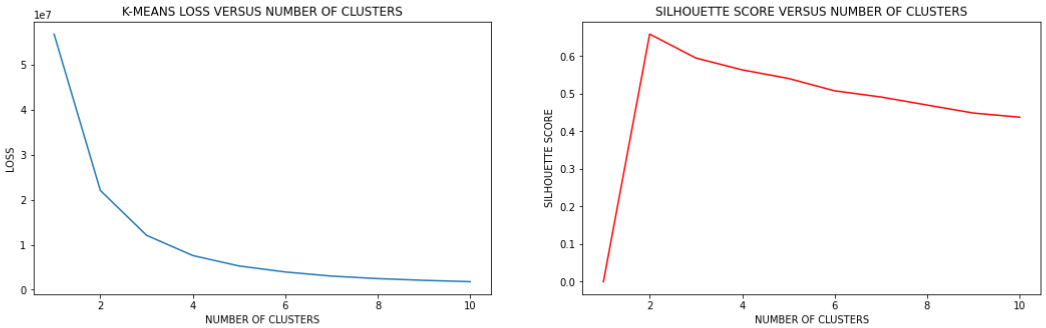

Although silhouette scores provide a quantitative reasoning to choosing an input k, they are not absolutes; in fact, there is an art form to such decision-making. In our modeling, with two clusters, the two centroids differed only in days spent watching, providing little to conclude from with regard to market segmentation. So, we chose to move to three clusters in order to extract an additional differentiation attribute. In this case, that proved to be the binary true/false on the male gender. Below are clustering plots. Keep in mind the multidimensionality of the dataset and clusters.   

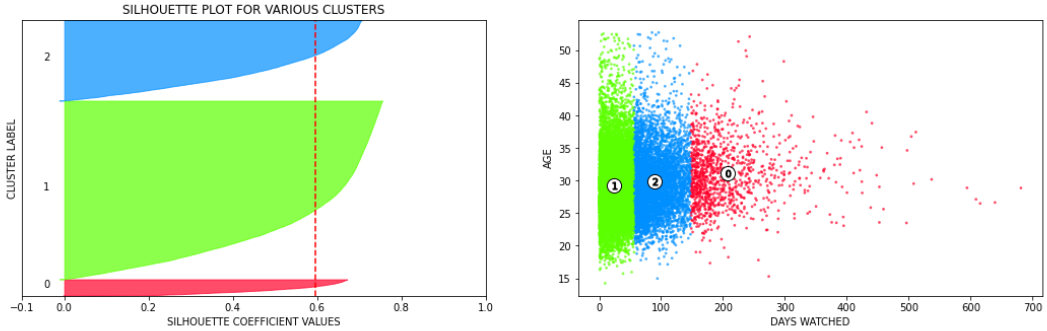

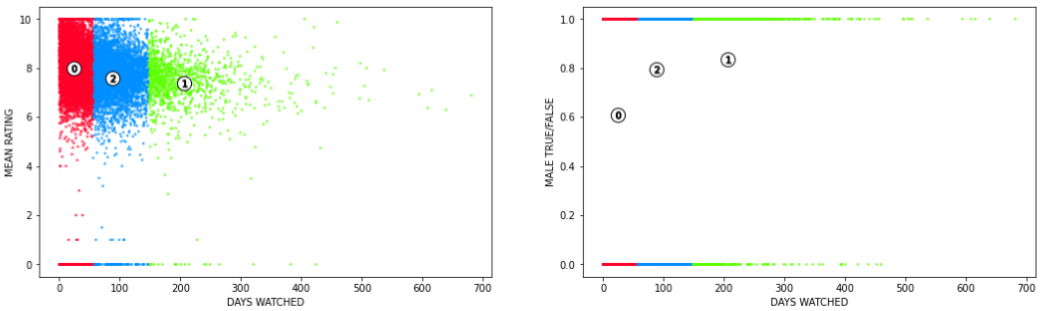

Above, we found three distinct clusters with the most impactful separating covariate being days spent watching. A silhouette plot for points in each cluster shows the varying cohesion of classified points with the average demarcated. A desired silhouette score plot for points would show steep inclines at high scores and minimize the shallow inclines that result from distant points to centroids. As shown, those who watch the greatest amount of anime tend to be between the ages of 22 and 36 whereas the low volume users tend to range more greatly from 17 to 50 years of age. Next, those leading the pack in viewing also tend to be more critical, likely due to the law of large numbers. Lastly, the quasi-gender plot's centroids show that the least male cluster also consumes the least anime, with the most male consuming the greatest number of days watched.

Although the above clustering was far better than expected for a dataset of this size, we still sought to improve the modeling by excluding noisy points that were furthest from centroids. In an audience of 19,000 U.S. users, there will always be outliers and from a marketing perspective it is not necessary to include them in explaining the vast majority of the audience. To rectify this, we turned to an alternative clustering method called DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN is more flexible in its clustering shapes by growing clusters from spatially dense areas and expanding them. DBSCAN also determines its own estimate of the number of clusters through internal silhouette scoring. Again, in need not classify every point as a cluster member. DBSCAN also utilizes min-max scaled covariates. Below is our model with four cluster, 103 points classified as noise (black), and a silhouette score of 0.731. 

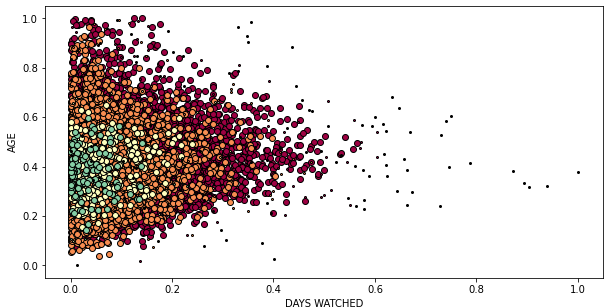

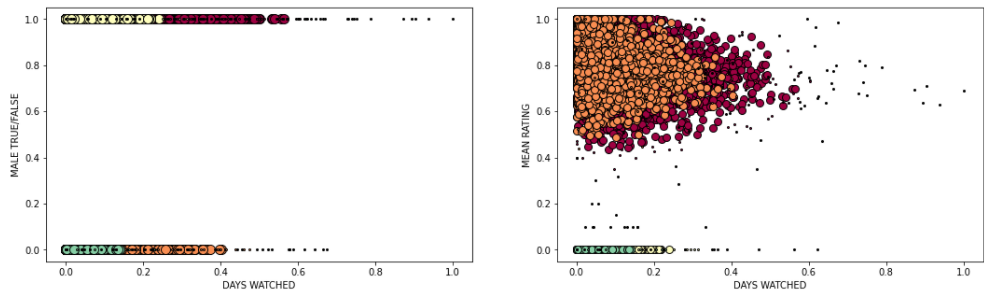

In contrast to $k$-means, here we see heavier reliance on the quasi-gender covariate. There are essentially high and low anime consumption clusters for both encoding options. This model leads to the conclusion that users who watch less also tend to rate zeroes, possibly contributing to not watching more or another concealed reason. Likely due to the DBSCAN algorithm seeing a dense area at rating zero, clustering seemingly treats low raters as very similar but it is unclear why so many users do so.  Lastly, those who watch the least anime and do not declare themselves as male tend to be the least varying in age. 